## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
# Load the data
file_path = "../data/real_madrid_data.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

## Data Preprocessing

In [3]:
# Keep only rows where the competition is 'La Liga'
df = df[df['Comp'] == 'La Liga']
# Drop the 'Comp' column after filtering
df = df.drop(columns=['Comp'])

# Reset the index for a clean DataFrame
df = df.reset_index(drop=True)


In [4]:
df.head()

,Season,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2017-2018,2017-08-20,22:15,Matchweek 1,Sun,Away,W,3,0,La Coruña,2.1,1.7,68.0,"27,770",Sergio Ramos,4-3-1-2,José González,Match Report,NaN
1,2017-2018,2017-08-27,22:15,Matchweek 2,Sun,Home,D,2,2,Valencia,3.2,0.9,66.0,"65,107",Marcelo,4-3-3,David Fernández,Match Report,NaN
2,2017-2018,2017-09-09,13:00,Matchweek 3,Sat,Home,D,1,1,Levante,3.1,0.7,68.0,"67,789",Sergio Ramos,4-2-3-1,Alejandro Hernández,Match Report,NaN
3,2017-2018,2017-09-17,20:45,Matchweek 4,Sun,Away,W,3,1,Real Sociedad,2.8,0.5,50.0,"24,966",Sergio Ramos,4-3-3,Ignacio Iglesias,Match Report,NaN
4,2017-2018,2017-09-20,22:00,Matchweek 5,Wed,Home,L,0,1,Betis,3.5,1.1,60.0,"65,102",Sergio Ramos,4-3-1-2,Antonio Matéu Lahoz,Match Report,NaN


In [5]:
# Drop columns that are not relevant for predicting results
columns_to_drop = ['Season', 'Date','Time', 'Round', 'Day', 'Match Report', 'Notes','Poss','Captain', 'Referee','Formation', 'Attendance']
df_cleaned = df.drop(columns=columns_to_drop)

In [6]:
df_cleaned.head()

,Venue,Result,GF,GA,Opponent,xG,xGA
0,Away,W,3,0,La Coruña,2.1,1.7
1,Home,D,2,2,Valencia,3.2,0.9
2,Home,D,1,1,Levante,3.1,0.7
3,Away,W,3,1,Real Sociedad,2.8,0.5
4,Home,L,0,1,Betis,3.5,1.1


In [7]:
# Map Result to numerical values
df_cleaned['Result'] = df_cleaned['Result'].map({'W': 1, 'D': 2, 'L': 0})
df_cleaned.head()

,Venue,Result,GF,GA,Opponent,xG,xGA
0,Away,1,3,0,La Coruña,2.1,1.7
1,Home,2,2,2,Valencia,3.2,0.9
2,Home,2,1,1,Levante,3.1,0.7
3,Away,1,3,1,Real Sociedad,2.8,0.5
4,Home,0,0,1,Betis,3.5,1.1


In [8]:
df_cleaned = df_cleaned.dropna(subset=['xG', 'xGA'])
df_cleaned.head()

,Venue,Result,GF,GA,Opponent,xG,xGA
0,Away,1,3,0,La Coruña,2.1,1.7
1,Home,2,2,2,Valencia,3.2,0.9
2,Home,2,1,1,Levante,3.1,0.7
3,Away,1,3,1,Real Sociedad,2.8,0.5
4,Home,0,0,1,Betis,3.5,1.1


In [9]:
# Count missing values in each column
print(df_cleaned.isnull().sum())
print(df_cleaned['Opponent'].unique())

Venue       0
Result      0
GF          0
GA          0
Opponent    0
xG          0
xGA         0
dtype: int64
['La Coruña' 'Valencia' 'Levante' 'Real Sociedad' 'Betis' 'Alavés'
 'Espanyol' 'Getafe' 'Eibar' 'Girona' 'Las Palmas' 'Atlético Madrid'
 'Málaga' 'Athletic Club' 'Sevilla' 'Barcelona' 'Celta Vigo' 'Villarreal'
 'Leganés' 'Valladolid' 'Huesca' 'Rayo Vallecano' 'Osasuna' 'Granada'
 'Mallorca' 'Cádiz' 'Elche' 'Almería']


In [10]:
# Convert GF and GA to numeric
df_cleaned['GF'] = pd.to_numeric(df_cleaned['GF'], errors='coerce')
df_cleaned['GA'] = pd.to_numeric(df_cleaned['GA'], errors='coerce')

# Check for any rows with NaN after conversion
print(df_cleaned.isnull().sum())

# Drop rows with invalid GF or GA values (if necessary)
df_cleaned = df_cleaned.dropna(subset=['GF', 'GA'])

Venue       0
Result      0
GF          0
GA          0
Opponent    0
xG          0
xGA         0
dtype: int64


In [11]:
# Calculate the average Result (target variable) for each Opponent
opponent_target_mean = df_cleaned.groupby('Opponent')['Result'].mean().to_dict()

# Map the target encoding to Opponent
df_cleaned['Opponent_Encoded'] = df_cleaned['Opponent'].map(opponent_target_mean)

# Drop the original Opponent column
df_cleaned = df_cleaned.drop(columns=['Opponent'])

# Check the transformed DataFrame
df_cleaned.head()

,Venue,Result,GF,GA,xG,xGA,Opponent_Encoded
0,Away,1,3,0,2.1,1.7,1.000000
1,Home,2,2,2,3.2,0.9,0.923077
2,Home,2,1,1,3.1,0.7,1.000000
3,Away,1,3,1,2.8,0.5,1.000000
4,Home,0,0,1,3.5,1.1,1.153846


In [12]:
# Encode Venue (Home=1, Away=0)
df_cleaned['Venue'] = df_cleaned['Venue'].map({'Home': 1, 'Away': 0})

# Check the updated DataFrame
df_cleaned.head()

,Venue,Result,GF,GA,xG,xGA,Opponent_Encoded
0,0,1,3,0,2.1,1.7,1.000000
1,1,2,2,2,3.2,0.9,0.923077
2,1,2,1,1,3.1,0.7,1.000000
3,0,1,3,1,2.8,0.5,1.000000
4,1,0,0,1,3.5,1.1,1.153846


## EDA

In [13]:
# Display summary statistics
print(df_cleaned.describe())

# Check column types
print(df_cleaned.info())

            Venue      Result          GF          GA          xG         xGA  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     0.500000    1.051587    1.988095    0.892857    1.880556    1.055952   
std      0.500995    0.593220    1.429574    0.936441    0.871539    0.628034   
min      0.000000    0.000000    0.000000    0.000000    0.400000    0.100000   
25%      0.000000    1.000000    1.000000    0.000000    1.200000    0.600000   
50%      0.500000    1.000000    2.000000    1.000000    1.800000    0.900000   
75%      1.000000    1.000000    3.000000    1.000000    2.400000    1.400000   
max      1.000000    2.000000    7.000000    5.000000    4.800000    3.400000   

       Opponent_Encoded  
count        252.000000  
mean           1.051587  
std            0.198507  
min            0.714286  
25%            0.875000  
50%            1.000000  
75%            1.153846  
max            1.384615  
<class 'pandas.core.frame.DataFrame'

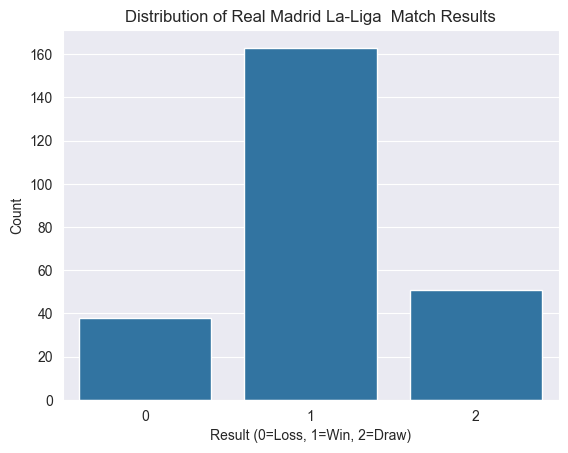

Result
1    0.646825
2    0.202381
0    0.150794
Name: proportion, dtype: float64


In [14]:
sns.countplot(x='Result', data=df_cleaned)
plt.title('Distribution of Real Madrid La-Liga  Match Results')
plt.xlabel('Result (0=Loss, 1=Win, 2=Draw)')
plt.ylabel('Count')
plt.show()
print(df_cleaned['Result'].value_counts(normalize=True))

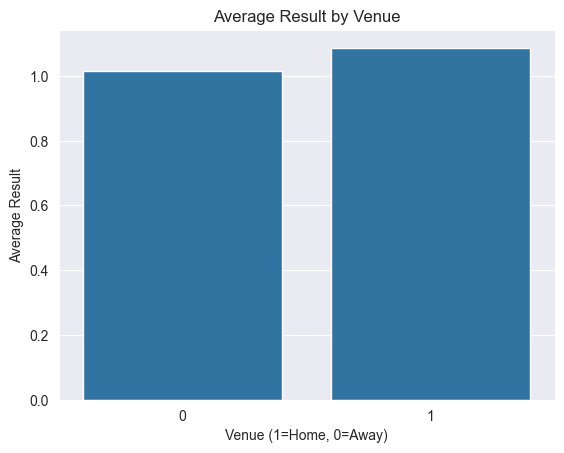

In [15]:
sns.barplot(x='Venue', y='Result', data=df_cleaned, errorbar=None)
plt.title('Average Result by Venue')
plt.xlabel('Venue (1=Home, 0=Away)')
plt.ylabel('Average Result')
plt.show()

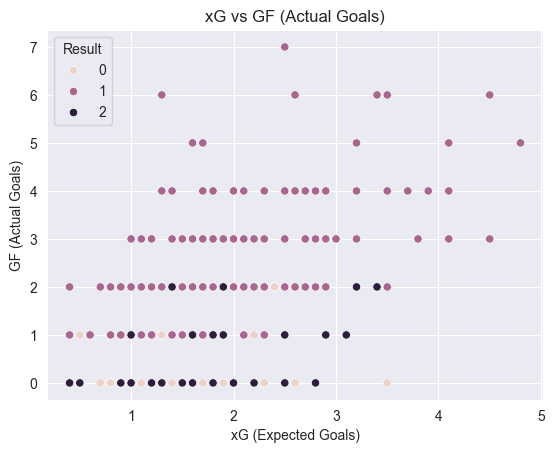

In [16]:
sns.scatterplot(x='xG', y='GF', hue='Result', data=df_cleaned)
plt.title('xG vs GF (Actual Goals)')
plt.xlabel('xG (Expected Goals)')
plt.ylabel('GF (Actual Goals)')
plt.show()

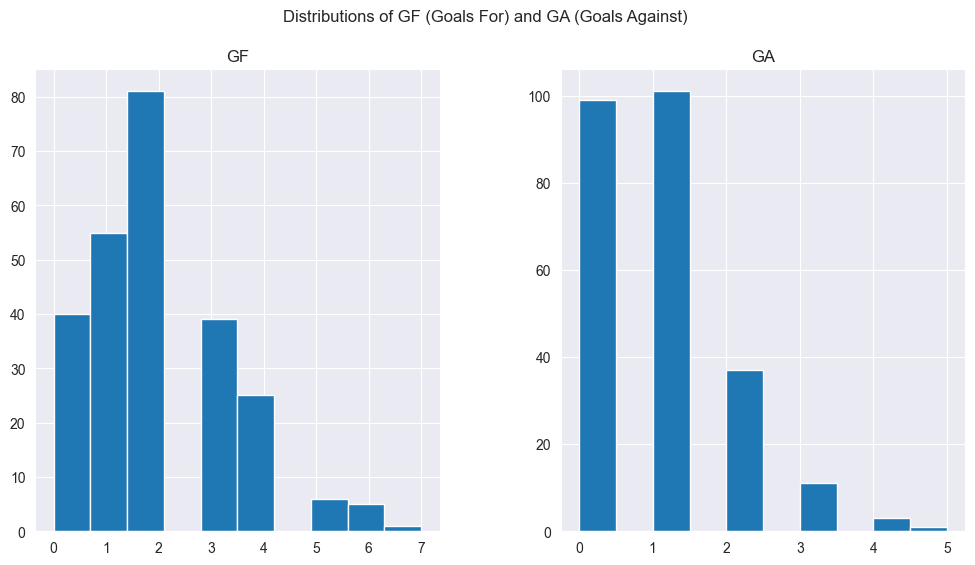

In [17]:
df_cleaned[['GF', 'GA']].hist(bins=10, figsize=(12, 6))
plt.suptitle('Distributions of GF (Goals For) and GA (Goals Against)')
plt.show()

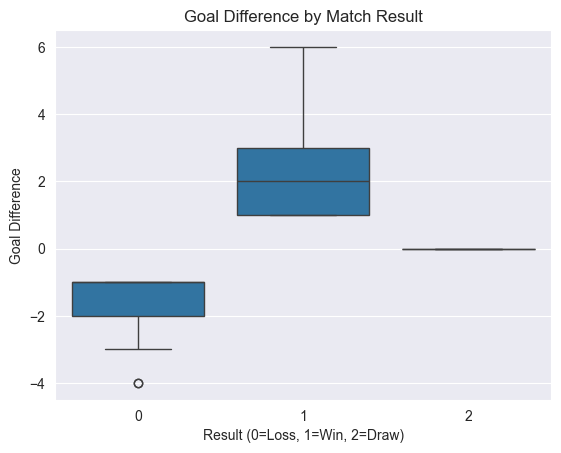

In [18]:
# Add Goal Difference column
df_cleaned['Goal_Diff'] = df_cleaned['GF'] - df_cleaned['GA']

# Plot Goal Difference by Result
sns.boxplot(x='Result', y='Goal_Diff', data=df_cleaned)
plt.title('Goal Difference by Match Result')
plt.xlabel('Result (0=Loss, 1=Win, 2=Draw)')
plt.ylabel('Goal Difference')
plt.show()

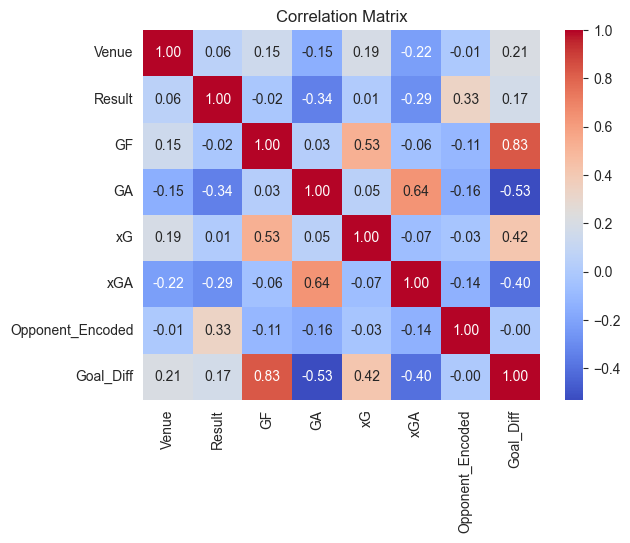

In [19]:
# Compute and plot correlation matrix
corr = df_cleaned.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

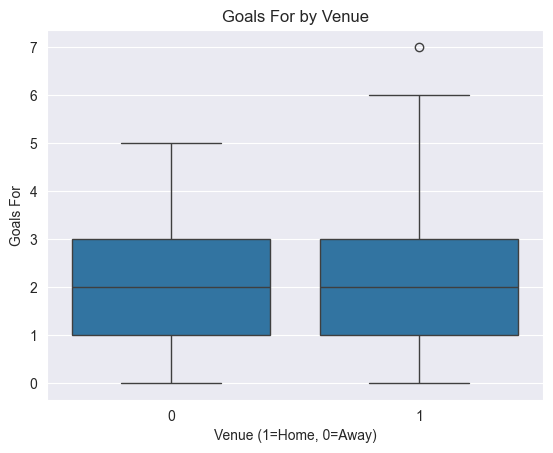

In [20]:
sns.boxplot(x='Venue', y='GF', data=df_cleaned)
plt.title('Goals For by Venue')
plt.xlabel('Venue (1=Home, 0=Away)')
plt.ylabel('Goals For')
plt.show()

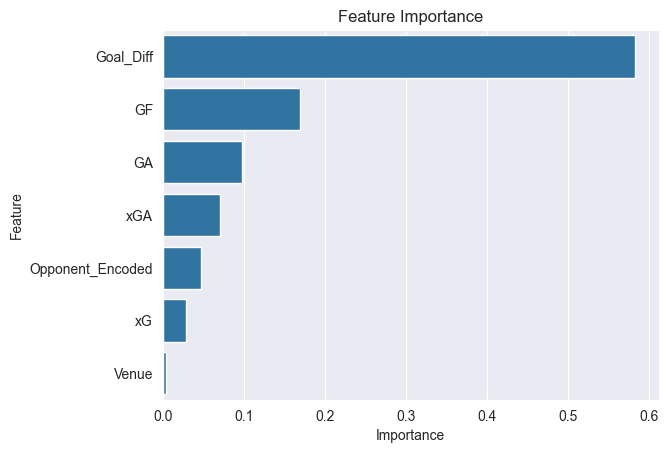

In [21]:
from sklearn.ensemble import RandomForestClassifier

X = df_cleaned.drop(columns=['Result'])
y = df_cleaned['Result']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

## Save Prprocessed Data

In [22]:
# Save the preprocessed dataset
df_cleaned.to_csv("../data/final_preprocessed_data.csv", index=False)
print("Preprocessed data saved for modeling.")

Preprocessed data saved for modeling.
